<a href="https://colab.research.google.com/github/karthika-shankar/BFSI_Churn_Analysis/blob/main/tcs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import emoji
import os
from google.colab import files


In [ ]:
filename = '/content/sentiment_analysis.csv'
df = pd.read_csv(filename)

df.info()

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CustomerID             100000 non-null  object 
 1   Name                   100000 non-null  object 
 2   Age                    100000 non-null  int64  
 3   Gender                 100000 non-null  object 
 4   Geography              100000 non-null  object 
 5   Native_Place           100000 non-null  object 
 6   Marital_Status         100000 non-null  object 
 7   Tenure                 100000 non-null  int64  
 8   Account_Type           100000 non-null  object 
 9   Balance                100000 non-null  float64
 10  NumOfProducts          100000 non-null  int64  
 11  HasCrCard              100000 non-null  int64  
 12  IsActiveMember         100000 non-null  int64  
 13  EstimatedSalary        100000 non-null  float64
 14  Monthly_Income         100000 non-nul

,CustomerID,Name,Age,Gender,Geography,Native_Place,Marital_Status,Tenure,Account_Type,Balance,...,CreditScore,Loan_Status,EMI_Amount,Exited,Branch_Code,Account_Open_Date,Last_Transaction_Date,Customer_Review,Review_Sentiment,Sentiment_Score
0,CID000001,Sunita Sharma,21,Other,Tamil Nadu,Hyderabad,Married,4,Current,676699.50,...,523,Auto,4238.57,0,BR072,2024-03-10,2024-06-23,Reasonable fees 💲,Neutral,0.733885
1,CID000002,Amit Kumar,53,Male,Karnataka,Pune,Divorced,8,Premium,215313.77,...,667,Business,30226.31,0,BR094,2020-02-26,2024-08-20,Professional staff 🌟,Positive,0.910818
2,CID000003,Rohan Gupta,55,Other,West Bengal,Lucknow,Married,2,Savings,661263.30,...,689,Education,43308.58,0,BR021,2024-04-07,2024-11-21,Great mobile app 🥰,Positive,0.983285
3,CID000004,Sunita Iyer,27,Other,Karnataka,Jaipur,Married,5,NRI,379455.44,...,332,Business,19905.26,0,BR028,2022-02-15,2024-12-11,Professional staff 🌟,Positive,0.910818
4,CID000005,Priya Iyer,76,Male,Tamil Nadu,Bangalore,Married,17,Senior Citizen,747013.80,...,441,Multiple,27711.22,0,BR015,2021-11-16,2024-07-04,Professional staff 🌟,Positive,0.910818


In [ ]:
#check for no missing values in columns
df.isnull().sum()


,0
CustomerID,0
Name,0
Age,0
Gender,0
Geography,0
Native_Place,0
Marital_Status,0
Tenure,0
Account_Type,0
Balance,0


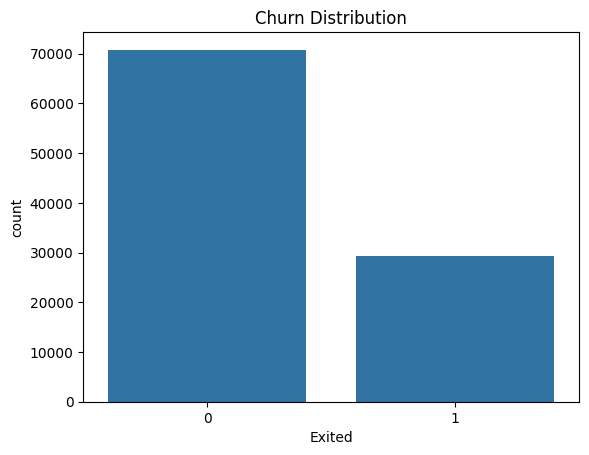

In [ ]:
# 1 = churned, 0 = retained
sns.countplot(data=df, x='Exited')
plt.title("Churn Distribution")
plt.show()


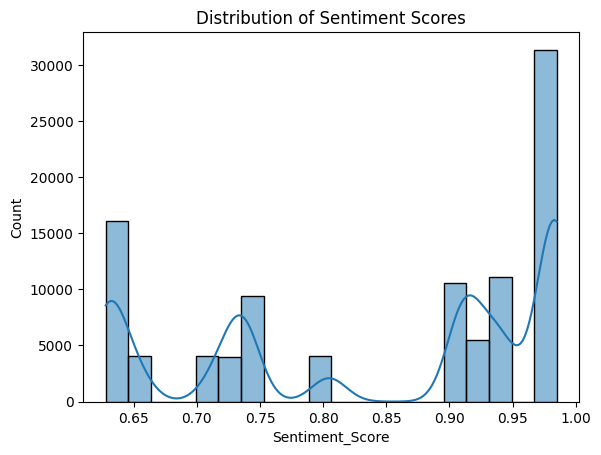

In [ ]:
#postive sentiments more towards 1 in 0-1 range
sns.histplot(df['Sentiment_Score'], bins=20, kde=True)
plt.title("Distribution of Sentiment Scores")
plt.show()


In [ ]:

print(df.columns.tolist())

['CustomerID', 'Name', 'Age', 'Gender', 'Geography', 'Native_Place', 'Marital_Status', 'Tenure', 'Account_Type', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Monthly_Income', 'CreditScore', 'Loan_Status', 'EMI_Amount', 'Exited', 'Branch_Code', 'Account_Open_Date', 'Last_Transaction_Date', 'Customer_Review', 'Review_Sentiment', 'Sentiment_Score']


In [ ]:
#feature engineering
df.drop(['CustomerID', 'Name', 'Account_Open_Date', 'Last_Transaction_Date'], axis=1, inplace=True)


In [ ]:
#check if dropped
print(df.columns.tolist())

['Age', 'Gender', 'Geography', 'Native_Place', 'Marital_Status', 'Tenure', 'Account_Type', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Monthly_Income', 'CreditScore', 'Loan_Status', 'EMI_Amount', 'Exited', 'Branch_Code', 'Customer_Review', 'Review_Sentiment', 'Sentiment_Score']


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding
one_hot_cols = ['Gender', 'Geography', 'Native_Place', 'Marital_Status', 'Account_Type', 'Loan_Status']

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

# Label Encoding for Branch_Code and Review_Sentiment
le = LabelEncoder()

df['Branch_Code'] = le.fit_transform(df['Branch_Code'])
df['Review_Sentiment'] = df['Review_Sentiment'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2})

# Check the new columns
print(df.columns.tolist())


['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Monthly_Income', 'CreditScore', 'EMI_Amount', 'Exited', 'Branch_Code', 'Customer_Review', 'Review_Sentiment', 'Sentiment_Score', 'Gender_Male', 'Gender_Other', 'Geography_Gujarat', 'Geography_Karnataka', 'Geography_Maharashtra', 'Geography_Rajasthan', 'Geography_Tamil Nadu', 'Geography_Telangana', 'Geography_Uttar Pradesh', 'Geography_West Bengal', 'Native_Place_Bangalore', 'Native_Place_Chennai', 'Native_Place_Delhi', 'Native_Place_Hyderabad', 'Native_Place_Jaipur', 'Native_Place_Kolkata', 'Native_Place_Lucknow', 'Native_Place_Mumbai', 'Native_Place_Pune', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Widowed', 'Account_Type_Joint', 'Account_Type_NRI', 'Account_Type_Premium', 'Account_Type_Salary', 'Account_Type_Savings', 'Account_Type_Senior Citizen', 'Account_Type_Student', 'Loan_Status_Business', 'Loan_Status_Education', 'Loan_Status_Gold', 'Loan_Status_Home', 'Loan

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler

# Select columns to scale ,excluding target 'Exited' and any already binary variables
cols_to_scale = ['Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Monthly_Income', 'CreditScore', 'EMI_Amount', 'Sentiment_Score']

scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
